# 作业4
邹子健 191830246
191803246@smail.nju.edu.cn



In [1]:
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point,MultiPoint
from shapely.wkt import dumps
from shapely.ops import nearest_points

def find_nearest_point(inp, ref):
    if len(ref)==0:
        return Point()
    else: 
        return nearest_points(inp,ref)[1]

    
# 读文件
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
fp_are = r'Lesson4_data/Helsinki.kml'
fp_add = r'Lesson4_data/addresses.shp'
Helsinki = gpd.read_file(fp_are, driver='KML')
addresses = gpd.read_file(fp_add)


# 创建字典
idlist = addresses['id'].to_list()+[0]
geolist = [dumps(addresses['geometry'][i])for i in range(0,len(addresses))]+['GEOMETRYCOLLECTION EMPTY']
idmap = dict(zip(geolist,idlist))


# 新增列
Helsinki['centroid point'] = [Helsinki['geometry'][i].centroid for i in range(0,len(Helsinki))]
Helsinki['addresses points'] = [MultiPoint([addresses['geometry'][i] for i in range(0,len(addresses)) if addresses['geometry'][i].within(Helsinki['geometry'][j])]) for j in range(0,len(Helsinki))]
Helsinki['nearest point'] = [find_nearest_point(Helsinki['centroid point'][i],Helsinki['addresses points'][i])for i in range(0,len(Helsinki))]
Helsinki['nearest point id'] = [idmap[dumps(Helsinki['nearest point'][i])] for i in range(0,len(Helsinki))]





In [113]:
Helsinki

,Name,Description,geometry,centroid point,addresses points,nearest point,nearest point id
0,Suur-Espoonlahti,,"POLYGON Z ((24.77506 60.10906 0.00000, 24.7766...",POINT (24.76754037242762 60.0440879200116),(),GEOMETRYCOLLECTION EMPTY,0
1,Suur-Kauklahti,,"POLYGON Z ((24.61578 60.17257 0.00000, 24.6155...",POINT (24.57415010885406 60.19764302289445),(),GEOMETRYCOLLECTION EMPTY,0
2,Vanha-Espoo,,"POLYGON Z ((24.67576 60.21201 0.00000, 24.6752...",POINT (24.60400724339237 60.25253297356344),(),GEOMETRYCOLLECTION EMPTY,0
3,Pohjois-Espoo,,"POLYGON Z ((24.76792 60.26920 0.00000, 24.7699...",POINT (24.68682879841453 60.30649462398335),(),GEOMETRYCOLLECTION EMPTY,0
4,Suur-Matinkylä,,"POLYGON Z ((24.75361 60.16631 0.00000, 24.7537...",POINT (24.76063843560942 60.15018263640097),(),GEOMETRYCOLLECTION EMPTY,0
5,Kauniainen,,"POLYGON Z ((24.69075 60.21958 0.00000, 24.6924...",POINT (24.71357964516679 60.21457067576294),(),GEOMETRYCOLLECTION EMPTY,0
6,Suur-Leppävaara,,"POLYGON Z ((24.79747 60.20827 0.00000, 24.7954...",POINT (24.77910492134015 60.22913609608545),(),GEOMETRYCOLLECTION EMPTY,0
7,Suur-Tapiola,,"POLYGON Z ((24.84436 60.16598 0.00000, 24.8443...",POINT (24.79937514852226 60.17816655223976),(),GEOMETRYCOLLECTION EMPTY,0
8,Myyrmäki,,"POLYGON Z ((24.82459 60.29025 0.00000, 24.8243...",POINT (24.81763652589348 60.27819504217397),(),GEOMETRYCOLLECTION EMPTY,0
9,Kivistö,,"POLYGON Z ((24.94309 60.33845 0.00000, 24.9421...",POINT (24.84180592296876 60.34358057021768),(),GEOMETRYCOLLECTION EMPTY,0


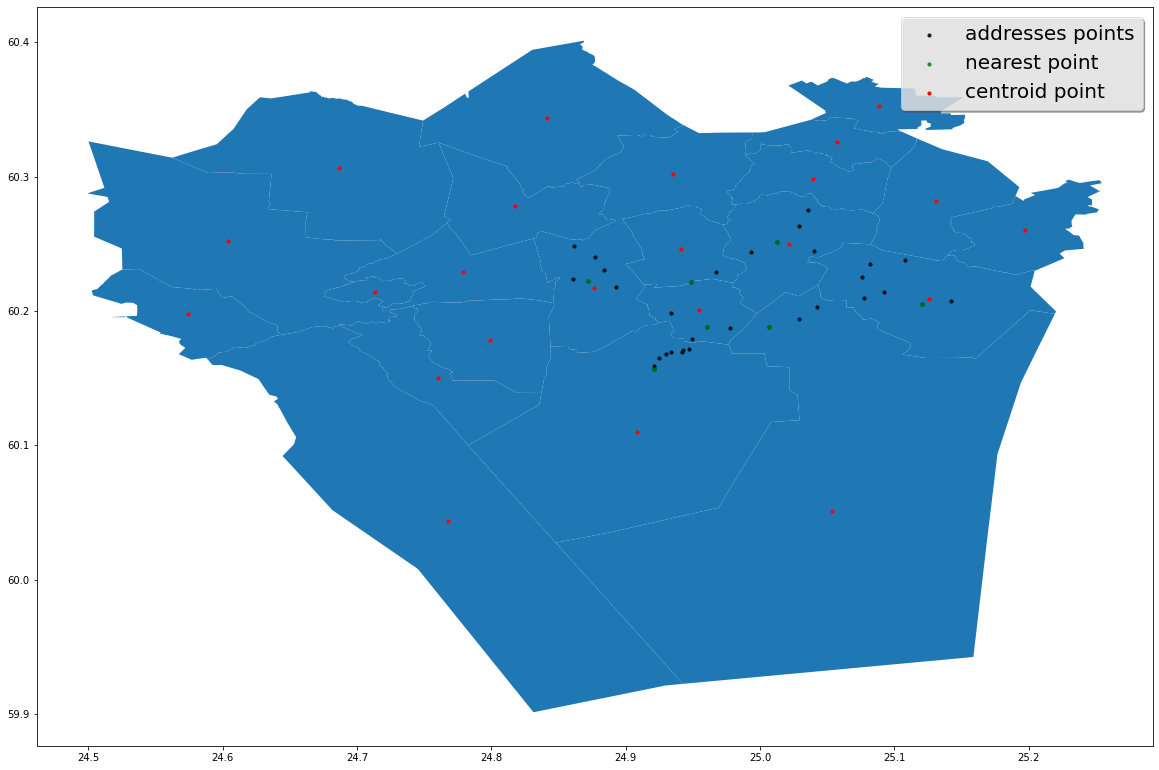

In [2]:
# 稍微画一下
base = Helsinki.plot(figsize=(20,20),alpha=1)
addresses.plot(ax = base,color='k',markersize=10,alpha = 0.8, label='addresses points')
outpoint = gpd.GeoDataFrame()
outpoint['geometry'] = Helsinki['nearest point']
cenpoint = gpd.GeoDataFrame()
cenpoint['geometry'] = [Helsinki['geometry'][i].centroid for i in range(0,len(Helsinki))]
outpoint.plot(ax = base,color='g',markersize=10, alpha = 0.8, label='nearest point')
cenpoint.plot(ax = base,color='r',markersize=10, alpha = 1, label='centroid point')

plt.legend(loc='best',fontsize=20,framealpha=0.7,shadow=True)
